In [0]:
## Breast cancer is the most common cancer amongst the women in the world. It accounts for 25 percent of all cancer and affects millions of people yearly alone. It starts with when cells in breast begin to grow out of control.These cells usually forms a tumor that can be seen via Xray.
## The early diagonosis increases the chance of survival. 
## The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous)
## In this study, my task is to classify tumors into malignant (cancerous) or benign (non-cancerous) using features obtained from several cell images.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [0]:
cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns = np.append(cancer['feature_names'],['target']))

In [16]:
print(cancer.head(10))

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890     0.0
1        20.57         17.77  ...                  0.08902     0.0
2        19.69         21.25  ...                  0.08758     0.0
3        11.42         20.38  ...                  0.17300     0.0
4        20.29         14.34  ...                  0.07678     0.0
5        12.45         15.70  ...                  0.12440     0.0
6        18.25         19.98  ...                  0.08368     0.0
7        13.71         20.83  ...                  0.11510     0.0
8        13.00         21.82  ...                  0.10720     0.0
9        12.46         24.04  ...                  0.20750     0.0

[10 rows x 31 columns]


In [18]:
cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

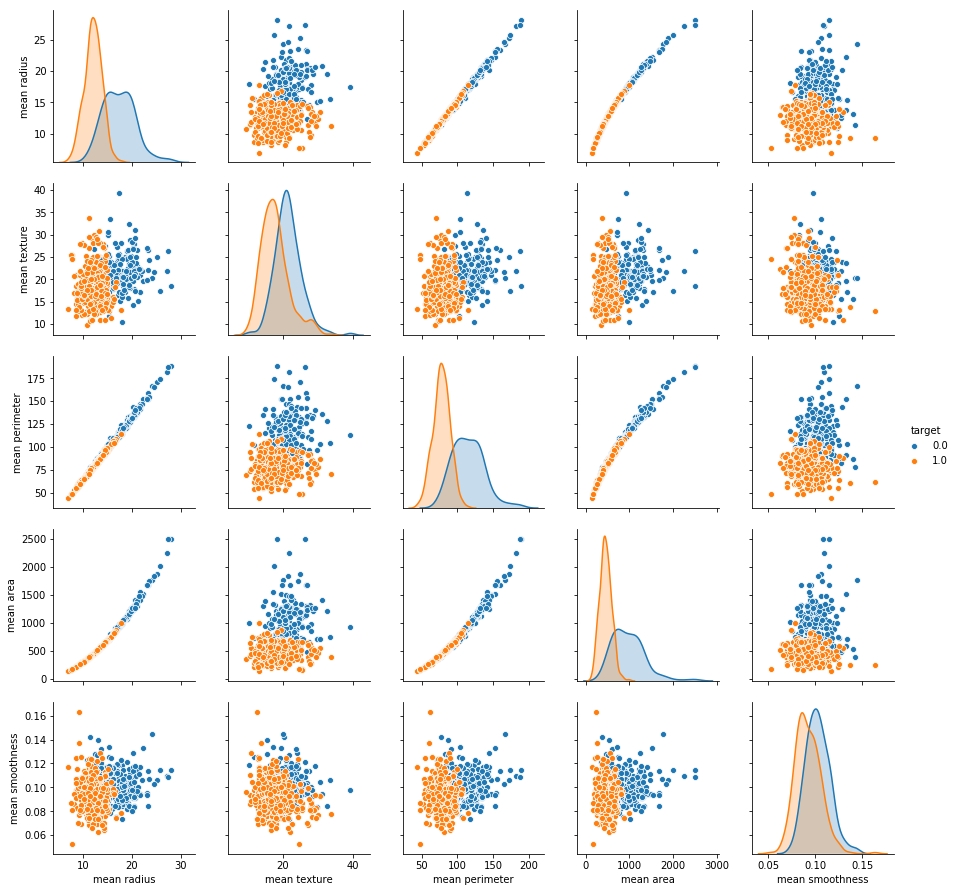

In [20]:
## Lets visualize the relationship between our features
sns.pairplot(cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'])

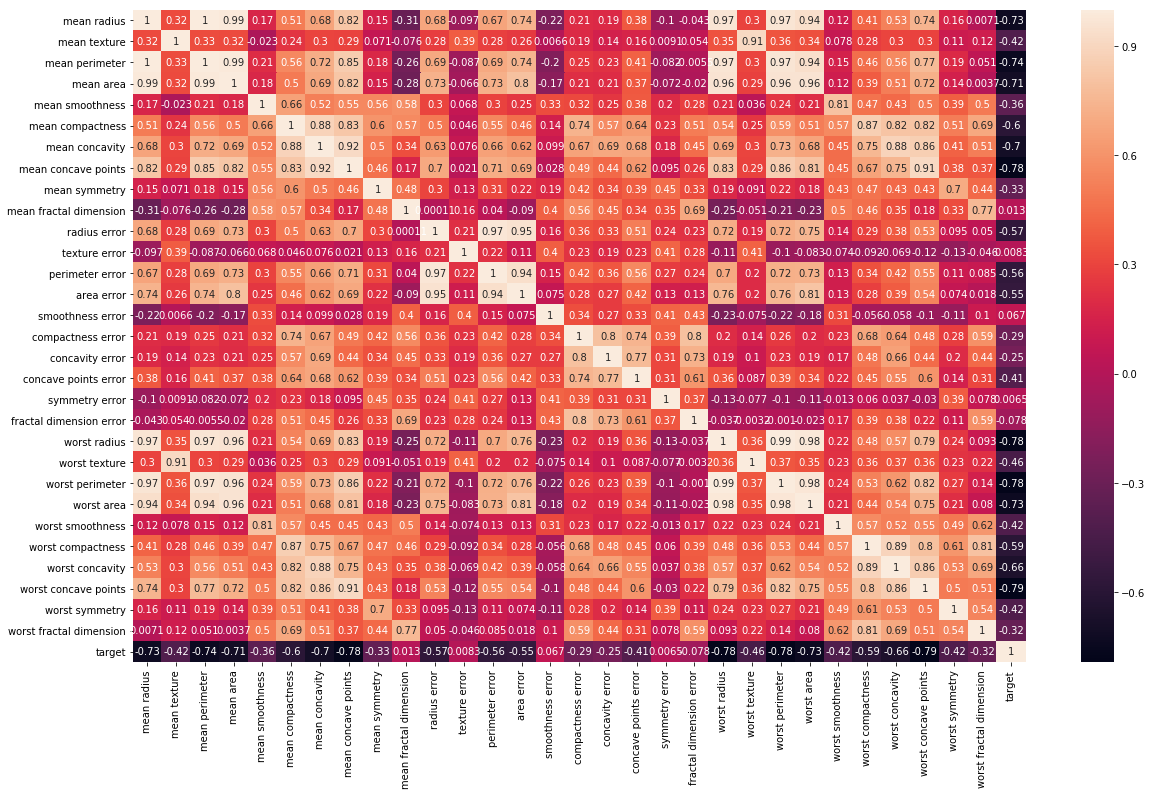

In [22]:
# Lets Check the correlation between our feautures
plt.figure(figsize=(20,12))
sns.heatmap(cancer.corr(), annot = True)

In [0]:
## The modeling process and introduction to classification modelling: Support Vector Machines(SVM).
## SVM is a binary linear classification whose decision boundaries are explicity constructed to minimize generalization error.
## SVM will classify:"If classification of observation is linearly separable ", SVM fits the decision boundaries that will define by the largest margins between the closest point for each classes. This is commonly called the "maxiumum margins hyperplane".


In [25]:
## Lets train the model
X = cancer.drop('target',axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
y = cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [30]:
print("The size of our training X (input_feautures) is ", X_train.shape)
print("\n")
print("The size of our testing X (input_feautures) is ", X_test.shape)
print("\n")
print("The size of our testing X (input_feautures) is ", Y_train.shape)
print("\n")
print("The size of our testing X (input_feautures) is ", Y_test.shape)
print("\n")

The size of our training X (input_feautures) is  (455, 30)


The size of our testing X (input_feautures) is  (114, 30)


The size of our testing X (input_feautures) is  (455,)


The size of our testing X (input_feautures) is  (114,)




In [0]:
from sklearn.svm import SVC

In [0]:
svc_model = SVC()

In [33]:
svc_model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)

In [0]:
## Lets create the confusion matrix for our classifier performance on the test dataset

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
cm = np.array(confusion_matrix(Y_test,y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=["is_cancer","is_healthy"],
                        columns = ['predicter_cancer','predicted_healthy'])
confusion

,predicter_cancer,predicted_healthy
is_cancer,66,0
is_healthy,48,0


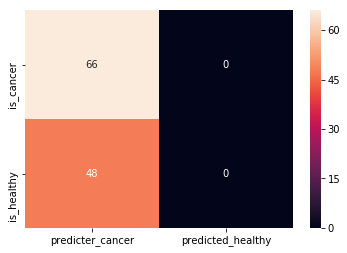

In [46]:
sns.heatmap(confusion,annot = True)

In [48]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [53]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [54]:
X_train_range = X_train_max-X_train_min
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [0]:
## This took us through the journey of explaining what “modeling” means in Data Science, difference between model prediction and inference, introduction to Support Vector Machine (SVM), advantages and disadvantages of SVM, training an SVM model to make accurate breast cancer classifications, improving the performance of an SVM model, and testing model accuracy using Confusion Matrix.